<a href="https://colab.research.google.com/github/carpalmar/sistema_recomendacion/blob/main/Book_Crossing_MPIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5> Most-popular-item Recommender</font></h1>

---

<center>
  <img src="https://storage.googleapis.com/kaggle-datasets-images/1661575/2726067/684ac0c4c14cb46d1047ccb620b45cac/dataset-cover.jpg?t=2021-10-21-03-18-09" width="800" height="300">
</center>


## Objetivo de este Notebook

1. Cargar y preprocesar un Dataset.
2. Realizar un sistema de recomendación basado en MPIR.
3. Comprobar el performance del sistema.

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y preparar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto


El conjunto de datos "Book-Crossing" (también conocido como BX) es una colección de datos relacionados con libros y reseñas de libros. Este conjunto de datos se centra en la interacción de los usuarios con libros y sus calificaciones, y es ampliamente utilizado en aplicaciones de sistemas de recomendación.



<b>Descripción de datos</b>

---

El conjunto de datos Book-Crossing contiene información sobre:

* <b>Libros:</b> Información sobre los libros, incluyendo su título, autor y año de publicación.

* <b>Usuarios:</b> Perfiles de los usuarios que interactúan con los libros, incluyendo su ID y ubicación.

* <b>Calificaciones:</b> Calificaciones numéricas que los usuarios asignan a los libros que han leído.

El conjunto de datos puede ser utilizado para varios propósitos, como la construcción de sistemas de recomendación de libros, el análisis de patrones de lectura y preferencias de los usuarios, y la investigación en el campo de la minería de datos y la inteligencia artificial.

---



<strong>Puede consultar este [link](https://www.kaggle.com/datasets/syedjaferk/book-crossing-dataset) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y preparar Dataset

In [1]:
# Principales librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") # Turn off warnings


In [5]:
# Download Book-Crossing Dataset
!curl -o dataset.zip "http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip"
!unzip dataset.zip
!ls -l


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.8M  100 24.8M    0     0  10.9M      0  0:00:02  0:00:02 --:--:-- 10.9M
Archive:  dataset.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX-Book-Ratings.csv     
replace BX-Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX-Books.csv            
replace BX-Users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX-Users.csv            
total 143412
-rw-rw-rw- 1 root root 30682276 Oct 11  2004 BX-Book-Ratings.csv
-rw-rw-rw- 1 root root 77787439 Oct 11  2004 BX-Books.csv
-rw-rw-rw- 1 root root 12284157 Oct 11  2004 BX-Users.csv
-rw-r--r-- 1 root root 26085508 Aug 26 15:39 dataset.zip
drwxr-xr-x 1 root root     4096 Aug 24 21:25 sample_data


In [6]:
ratings = pd.read_csv("BX-Book-Ratings.csv", sep=";", encoding="ISO-8859-1")
books   = pd.read_csv("BX-Books.csv",        sep=";", encoding="ISO-8859-1", error_bad_lines=False)
users   = pd.read_csv("BX-Users.csv",        sep=";", encoding="ISO-8859-1")

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
print("  Users: {} \n  Books: {}\n  Ratings: {}".format(len(users), len(books), len(ratings)))


  Users: 278858 
  Books: 271360
  Ratings: 1149780


In [12]:
users.columns = users.columns.str.lower().str.replace('-', '_')
books.columns = books.columns.str.lower().str.replace('-', '_')
ratings.columns = ratings.columns.str.lower().str.replace('-', '_')

### 2.1. Data de usuarios

In [13]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
users["age"].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

In [15]:
IQR = np.nanpercentile(users['age'], 75) - np.nanpercentile(users['age'], 25)
IQR

20.0

In [16]:
# Ejemplo de remoción de outliers
IQR = np.nanpercentile(users['age'], 75) - np.nanpercentile(users['age'], 25)
lower_threshold = np.nanpercentile(users['age'], 50) - 1.5*IQR
upper_threshold = np.nanpercentile(users['age'], 50) + 1.5*IQR

users = users[(users['age'] > lower_threshold) & (users['age'] < upper_threshold)]

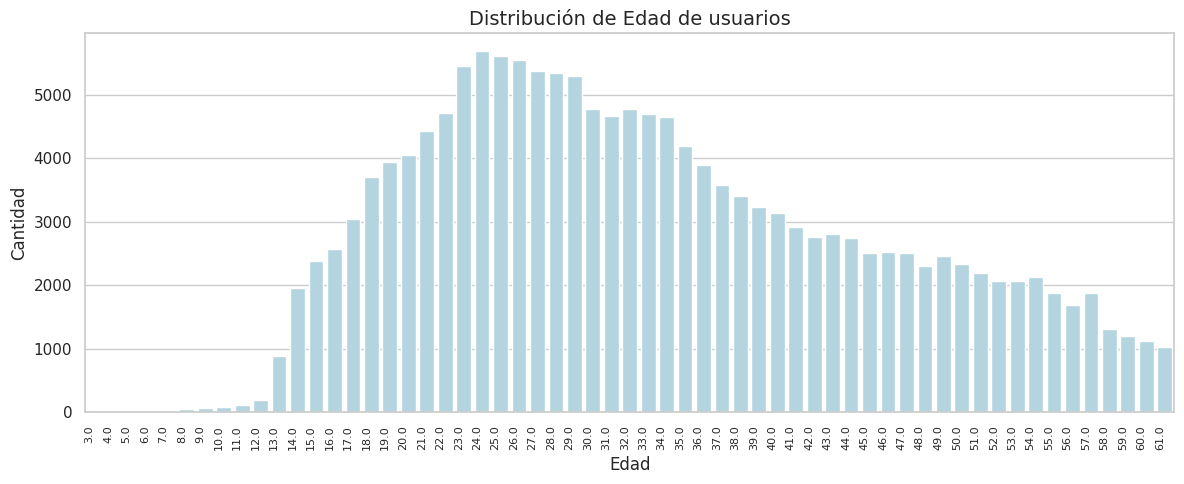

In [17]:
# Establecer el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 5))  # Ajusta el tamaño de la figura si es necesario
ax = sns.countplot(data=users, x='age', color='lightblue')

# Personalizar el eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Ajustar el tamaño de fuente de las etiquetas del eje x
ax.tick_params(axis='x', labelsize=8)

# Agregar etiquetas y título
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Edad de usuarios', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### 2.2. Data de libros

In [18]:
#dropping the image columns
books.drop(columns=['image_url_s', 'image_url_m', 'image_url_l'], inplace=True) # drop image-url columns

In [19]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [20]:
#converting years of publication to integer
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

In [21]:
#replacing all years of publication that are 0 with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

In [22]:
# Ejemplo de remoción de outliers
lower_threshold = 1964
upper_threshold = 2004

books = books[(books['year_of_publication'] > lower_threshold) & (books['year_of_publication'] < upper_threshold)]
books.year_of_publication = books.year_of_publication.astype(int)

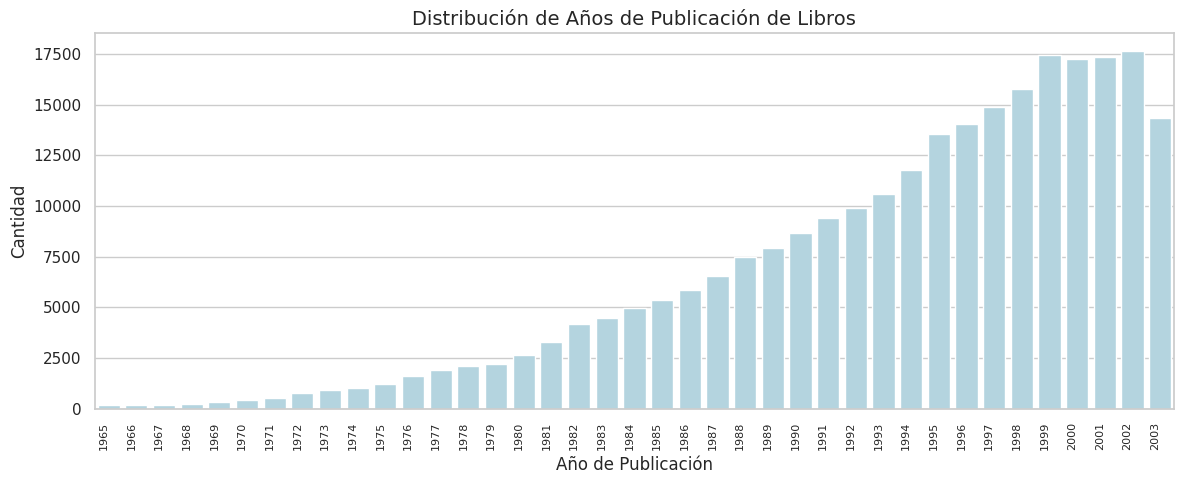

In [23]:
# Establecer el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 5))  # Ajusta el tamaño de la figura si es necesario
ax = sns.countplot(data=books, x='year_of_publication', color='lightblue')

# Personalizar el eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Ajustar el tamaño de fuente de las etiquetas del eje x
ax.tick_params(axis='x', labelsize=8)

# Agregar etiquetas y título
plt.xlabel('Año de Publicación', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Años de Publicación de Libros', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [24]:
#correcting publisher names and assigning the name 'Other' to those with missing publisher names
books.publisher= books.publisher.str.replace('&amp;', '&', regex=False)

In [25]:
books.publisher.replace(np.nan,'Other', inplace = True)

In [26]:
#replacing the NaN in for book_author with Unknown
books.book_author.replace(np.nan,"Unknown", inplace=True)

In [27]:
#dropping the rows with NaN year of publication
books = books.dropna(how='any', axis = 0)

### 2.3. Data de Ratings

In [28]:
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
#removing the rows with an implicit book_rating of 0
ratings = ratings[ratings.book_rating!=0]

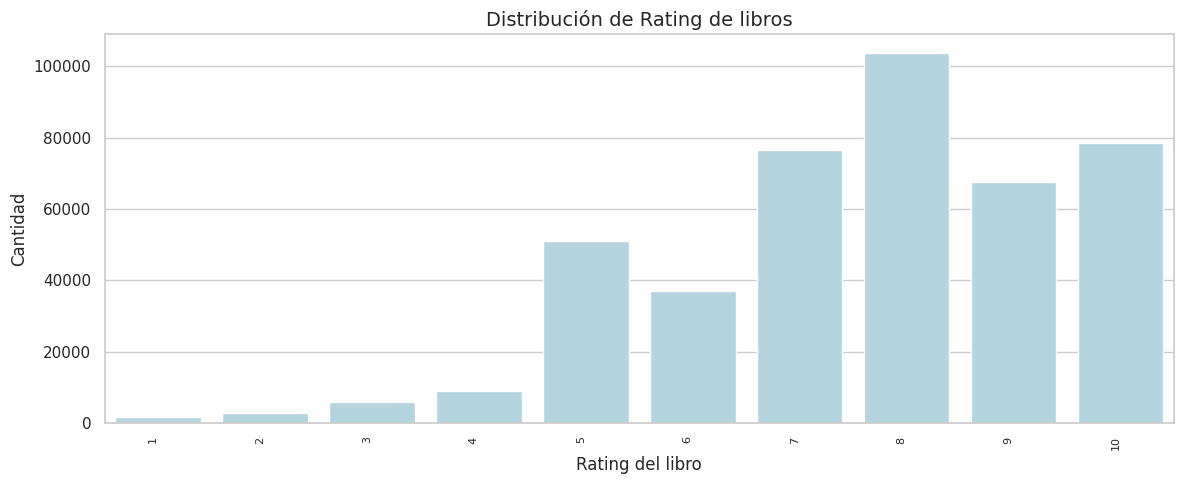

In [30]:
# Establecer el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 5))  # Ajusta el tamaño de la figura si es necesario
ax = sns.countplot(data=ratings, x='book_rating', color='lightblue')

# Personalizar el eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Ajustar el tamaño de fuente de las etiquetas del eje x
ax.tick_params(axis='x', labelsize=8)

# Agregar etiquetas y título
plt.xlabel('Rating del libro', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Rating de libros', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### 2.4. Unificando data

In [31]:
df_unified = pd.merge(users[['user_id', 'age']], ratings, on = 'user_id', how = 'inner')
df_unified = pd.merge(df_unified, books[['isbn', 'book_title']], on = 'isbn', how = 'inner')

df_unified.head()

,user_id,age,isbn,book_rating,book_title
0,19,14.0,0375759778,7,Prague : A Novel
1,8720,31.0,0375759778,3,Prague : A Novel
2,24525,28.0,0375759778,5,Prague : A Novel
3,38502,34.0,0375759778,8,Prague : A Novel
4,108789,27.0,0375759778,7,Prague : A Novel


In [32]:
df_unified.loc[df_unified.user_id ==  387]

,user_id,age,isbn,book_rating,book_title
2681,387,17.0,0198320264,2,Julius Caesar (Oxford School Shakespeare)
2684,387,17.0,0373196989,6,Santa Brought A Son : Marrying The Boss's Daug...
2686,387,17.0,0451527747,10,Alice's Adventures in Wonderland and Through t...
2695,387,17.0,0812504208,9,The Adventures of Tom Sawyer
2698,387,17.0,1590071212,9,Jane Eyre


# 3. Most-popular-item Recommender

Se basa en la popularidad de los elementos para hacer recomendaciones a los usuarios. En lugar de utilizar algoritmos complicados para analizar las preferencias individuales de los usuarios, este tipo de sistema simplemente recomienda los elementos que son más populares.

La lógica detrás de un Most-Popular-Item Recommender es bastante simple: si un artículo es popular y ha sido apreciado por muchas personas, es más probable que sea del agrado de nuevos usuarios también. Este enfoque es especialmente útil cuando no se dispone de suficiente información sobre los usuarios y sus preferencias.



Ventajas de un Most-Popular-Item Recommender:

* <b>Simplicidad:</b> Es fácil de implementar y no requiere algoritmos complejos.

* <b>Efectividad inicial:</b> Puede funcionar bien en situaciones donde hay poca información sobre los usuarios.

* <b>Escalabilidad:</b> Puede manejar grandes conjuntos de datos sin problemas.



Desventajas de un Most-Popular-Item Recommender:

* <b>Falta de personalización:</b> No tiene en cuenta las preferencias individuales de los usuarios, lo que puede llevar a recomendaciones no relevantes.

* <b>Burbuja de filtro:</b> Puede llevar a una sobrerrepresentación de elementos populares y no descubrir nuevos elementos.

* <b>No considera cambios en el tiempo:</b> No tiene en cuenta las tendencias cambiantes o los gustos cambiantes de los usuarios.
---

### 3.1. Muestreo de datos


El conjunto de datos en machine learning se divide típicamente en dos partes: el conjunto de entrenamiento (train) y el conjunto de prueba (test). Estas divisiones se utilizan para entrenar y evaluar los modelos.



<b>Train:</b> El conjunto de entrenamiento se utiliza para entrenar el modelo de machine learning. Es aquí donde el modelo "aprende" los patrones y relaciones en los datos para poder hacer predicciones o clasificaciones.

<b>Test:</b> El conjunto de prueba se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Es una medida objetiva de la capacidad del modelo para generalizar y realizar predicciones precisas en nuevos datos.

In [33]:
# Muestreo
#La función train_test_split de scikit-learn se utiliza para dividir un conjunto de datos en subconjuntos de train y test.
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_unified, # Base de datos
                               train_size = 0.7, # Especificar el tamaño de train/test
                               random_state = 123) # Semilla aleatoria


In [34]:
train.head()

,user_id,age,isbn,book_rating,book_title
196695,135471,17.0,0373709633,9,Annalee And The Lawman (Count On A Cop) (Harle...
100138,156924,15.0,0395645662,9,The Giver (Newbery Medal Book)
244353,269566,9.0,1575843722,5,The Reader's Digest Children's Atlas of the Wo...
151232,112541,22.0,0061094129,8,Legal Tender
31863,80538,32.0,0452280621,8,Beloved


### 3.2. Most Popular Items recommender: No Personalizada


In [35]:
most_popular = train.groupby('book_title')[['isbn']].count().reset_index()
most_popular.rename(columns = {'isbn' : 'popularity'}, inplace = True)
most_popular.sort_values(by = 'popularity', ascending = False, inplace = True)
most_popular.head()

,book_title,popularity
64063,The Lovely Bones: A Novel,306
59568,The Da Vinci Code,252
26315,Harry Potter and the Chamber of Secrets (Book 2),178
4682,Angels &amp; Demons,177
67619,The Secret Life of Bees,173


In [36]:
# Aplicando recomendaciones

test['rec_1'] = 'The Lovely Bones: A Novel'
test['rec_2'] = 'The Da Vinci Code'
test['rec_3'] = 'Harry Potter and the Chamber of Secrets (Book 2)'


Veamos la calidad de la recomendación

In [37]:
test.head()

,user_id,age,isbn,book_rating,book_title,rec_1,rec_2,rec_3
173661,98391,52.0,0441010970,10,The Wrong Reflection,The Lovely Bones: A Novel,The Da Vinci Code,Harry Potter and the Chamber of Secrets (Book 2)
19366,145330,61.0,0515134384,7,The Cat Who Went Up the Creek,The Lovely Bones: A Novel,The Da Vinci Code,Harry Potter and the Chamber of Secrets (Book 2)
208289,162052,51.0,0785801863,10,Scandinavian Cooking: Classic Cooking from Swe...,The Lovely Bones: A Novel,The Da Vinci Code,Harry Potter and the Chamber of Secrets (Book 2)
197300,137190,31.0,0718145305,8,"Under the duvet: Notes on high heels, movie de...",The Lovely Bones: A Novel,The Da Vinci Code,Harry Potter and the Chamber of Secrets (Book 2)
209721,164905,29.0,0373031327,6,"Sea Fever (Harlequin Romance, No 3132)",The Lovely Bones: A Novel,The Da Vinci Code,Harry Potter and the Chamber of Secrets (Book 2)


Ratios de conversión

In [38]:
len(test[test.book_title == test.rec_1])/len(test.user_id.drop_duplicates())

0.007795852606413388

In [39]:
len(test[test.book_title == test.rec_2])/len(test.user_id.drop_duplicates())

0.005249207421651681

In [40]:
len(test[test.book_title == test.rec_3])/len(test.user_id.drop_duplicates())

0.003274258094693623

Afinidad de la recomendación

In [41]:
test[test.book_title == test.rec_1].book_rating.mean()

8.213333333333333

In [42]:
test[test.book_title == test.rec_2].book_rating.mean()

8.514851485148515

In [43]:
test[test.book_title == test.rec_3].book_rating.mean()

8.857142857142858

### 3.2. Most Popular Items recommender: Semi-Personalizada


In [ ]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 3,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(train['age']).reshape(-1, 1))


In [ ]:
train['age' + '_rango'] = discretizer.transform(np.array(train['age']).reshape(-1, 1))


In [ ]:
most_popular = train.groupby(['book_title', 'age_rango'])[['isbn']].count().reset_index()
most_popular.rename(columns = {'isbn' : 'popularity'}, inplace = True)
most_popular.sort_values(by = 'popularity', ascending = False, inplace = True)

#pd.set_option('display.max_colwidth', None)
most_popular[most_popular.age_rango == 0].head(3)

In [ ]:
most_popular[most_popular.age_rango == 1].head(3)

In [ ]:
most_popular[most_popular.age_rango == 2].head(3)

Veamos la calidad de la recomendación

In [ ]:
test['age' + '_rango'] = discretizer.transform(np.array(test['age']).reshape(-1, 1))

In [ ]:
# Aplicando recomendaciones

def recommendation_1(age_range):
  if age_range == 0:
    return "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"
  elif age_range == 1:
    return "The Lovely Bones: A Novel"
  elif age_range == 2:
    return "The Da Vinci Code"


test['rec_1'] = test.age_rango.apply(lambda x: recommendation_1(x))

Ratios de conversión

In [ ]:
len(test[test.book_title == test.rec_1])/len(test.user_id.drop_duplicates())

Afinidad de la recomendación

In [ ]:
test[test.book_title == test.rec_1].book_rating.mean()

In [ ]:
# Aplicando segunda recomendacion

def recommendation_2(age_range):
  if age_range == 0:
    return "The Catcher in the Rye"
  elif age_range == 1:
    return "The Da Vinci Code"
  elif age_range == 2:
    return "The Lovely Bones: A Novel"


test['rec_2'] = test.age_rango.apply(lambda x: recommendation_2(x))

In [ ]:
len(test[test.book_title == test.rec_2])/len(test.user_id.drop_duplicates())

In [ ]:
test[test.book_title == test.rec_2].book_rating.mean()

### 3.3. Most Acepted Items recommender: No Personalizada

In [ ]:
# Muestreo
train, test = train_test_split(df_unified, # Base de datos
                               train_size = 0.7, # Especificar el tamaño de train/test
                               random_state = 123) # Semilla aleatoria


In [ ]:
most_popular = train.groupby('book_title').aggregate({'book_rating' : 'mean', 'user_id' : 'count'}).reset_index()
most_popular.rename(columns = {'book_rating' : 'popularity', 'user_id': 'mat'}, inplace = True)
most_popular.sort_values(by = 'popularity', ascending = False, inplace = True)
most_popular[most_popular.mat > 100].head()

In [ ]:
# Aplicando recomendaciones

test['rec_1'] = 'Harry Potter and the Goblet of Fire (Book 4)'
test['rec_2'] = 'Harry Potter and the Prisoner of Azkaban (Book 3)'
test['rec_3'] = 'Harry Potter and the Order of the Phoenix (Book 5)'


Veamos la calidad de la recomendación

In [ ]:
test.head()

Ratios de conversión

In [ ]:
len(test[test.book_title == test.rec_1])/len(test.user_id.drop_duplicates())

In [ ]:
len(test[test.book_title == test.rec_2])/len(test.user_id.drop_duplicates())

In [ ]:
len(test[test.book_title == test.rec_3])/len(test.user_id.drop_duplicates())

Afinidad de la recomendación

In [ ]:
test[test.book_title == test.rec_1].book_rating.mean()

In [ ]:
test[test.book_title == test.rec_2].book_rating.mean()

In [ ]:
test[test.book_title == test.rec_3].book_rating.mean()

---
## Gracias por completar este laboratorio!